 ** “Topic modelling” problem using
NLP techniques.

Team

Prajakta Borude

Tushar Joshi

Pramesh SURVE


**"Building a Dynamic Product Recommendation System: Enhancing Customer Experience and Driving Growth in E-commerce"**


The recommendation system outlined above offers a comprehensive approach to enhancing the customer experience and driving business growth in e-commerce settings. By segmenting the system into three parts, it addresses the varying needs and contexts of customers at different stages of their journey on the website.

Part I focuses on introducing new customers to the most popular products on the platform, leveraging product popularity as a proxy for relevance. This ensures that customers are presented with items that are likely to appeal to a broad audience, facilitating engagement and initial purchases.

Part II delves deeper into personalization by leveraging collaborative filtering techniques. By analyzing the purchase history and ratings of both the current customer and other users who have bought similar items, the system generates tailored recommendations that align closely with individual preferences. This approach enhances the relevance of suggestions and fosters long-term customer satisfaction and loyalty.

Part III caters to businesses launching their e-commerce websites without any pre-existing product rating data. By leveraging content-based recommendation techniques, such as analyzing product descriptions and characteristics, this part of the system provides relevant suggestions to users based on intrinsic product attributes. As the platform gathers user interactions and purchase histories over time, it can seamlessly transition to more advanced recommendation methods, incorporating collaborative filtering to further refine suggestions.

Overall, this recommendation system not only improves the shopping experience for customers but also contributes to better customer acquisition and retention for businesses. By offering personalized and relevant product recommendations, businesses can increase customer engagement, drive sales, and foster lasting relationships with their audience.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
amazon_ratings = pd.read_csv('/content/ratings_Beauty.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/ratings_Beauty.csv'

In [ ]:
amazon_ratings.shape

In [ ]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

In [ ]:
most_popular.head(30).plot(kind = "bar")

In [4]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

NameError: name 'amazon_ratings' is not defined

In [3]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

NameError: name 'amazon_ratings1' is not defined

In [9]:
ratings_utility_matrix.shape

(9697, 886)

In [10]:
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

In [12]:
X1 = X

In [13]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [14]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [15]:
X.index[99]

'6117036094'

In [16]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [17]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [18]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['0205616461',
 '0733001998',
 '1304139212',
 '130414089X',
 '130414643X',
 '1304174905',
 '1304196070',
 '1304511081',
 '1304511154']

In [22]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [25]:
import pandas as pd

# Attempt to read CSV file with error handling
try:
    product_descriptions = pd.read_csv('/content/product_descriptions.csv', error_bad_lines=False)
    print("CSV file loaded successfully.")
    print("Shape of DataFrame:", product_descriptions.shape)
except Exception as e:
    print("Error:", e)

# If parsing error occurs, use an alternative approach to read CSV file
if 'product_descriptions' not in locals():
    with open('/content/product_descriptions.csv', 'r', errors='ignore') as file:
        lines = file.readlines()
    clean_lines = [line.strip() for line in lines if line.strip()]
    product_descriptions = pd.DataFrame([line.split(',') for line in clean_lines])

# Optionally, you may want to further process or clean the DataFrame

<ipython-input-25-c90369b0cc6b>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  product_descriptions = pd.read_csv('/content/product_descriptions.csv', error_bad_lines=False)


CSV file loaded successfully.
Shape of DataFrame: (124428, 2)


In [26]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [27]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [28]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

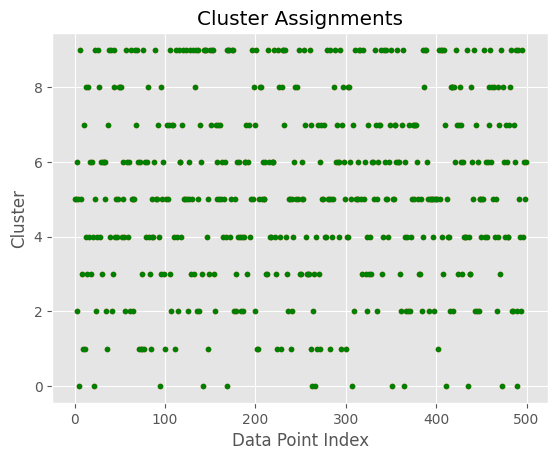

In [34]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
# Plot the cluster assignments in green color
plt.plot(y_kmeans, ".", color="green")  # Change color to green
plt.title('Cluster Assignments')
plt.xlabel('Data Point Index')
plt.ylabel('Cluster')
plt.show()

In [44]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print



In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Subset of product descriptions (500 rows)
product_descriptions1 = product_descriptions.head(500)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])

# Fitting K-Means to the dataset
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

# Get the top terms per cluster
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()  # Use get_feature_names_out() for TfidfVectorizer

def print_cluster(i):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

for i in range(true_k):
    print_cluster(i)



Top terms per cluster:
Cluster 0: joe grass yard leaf leaves blower easy debris ltx height
Cluster 1: storage lbs shelves easy duty capacity shelf steel unit watering
Cluster 2: light air fan ft watt installation use control help cooling
Cluster 3: tool power cutting volt free easy handle battery helps saw
Cluster 4: paint roller brush frame ladder window screen painting azek cover
Cluster 5: nickel cabinet door hardware design satin pull sink easy center
Cluster 6: wood painted ft door proposition nbsp moulding residents california 65
Cluster 7: water metal heater roof ice use easy roofing seal designed
Cluster 8: patio fence bamboo outdoor ft natural frame resistant steel post
Cluster 9: toilet piece flush design tile wall bowl recommended installation water


In [48]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [49]:
show_recommendations("cutting tool")

Cluster 3: tool power cutting volt free easy handle battery helps saw


In [50]:
show_recommendations("cutting tool")

Cluster 3: tool power cutting volt free easy handle battery helps saw


In [51]:
show_recommendations("spray paint")

Cluster 4: paint roller brush frame ladder window screen painting azek cover


In [52]:
show_recommendations("steel drill")

Cluster 1: storage lbs shelves easy duty capacity shelf steel unit watering


In [53]:
show_recommendations("water")

Cluster 7: water metal heater roof ice use easy roofing seal designed


**Conclusion**



1.In conclusion, when launching an e-commerce website devoid of user-item purchase or rating data, implementing a content-based recommendation system serves as a foundational strategy.

2.By analyzing product descriptions and employing techniques like TF-IDF vectorization and clustering algorithms such as K-Means, this approach facilitates the generation of personalized recommendations tailored to users' initial browsing behaviors.


3.As the platform accumulates user interactions and purchase histories, it can evolve to incorporate more sophisticated recommendation techniques like collaborative filtering, leveraging explicit user feedback to further refine suggestions. Through this iterative process,

4.The recommendation engine continuously enhances the user experience, delivering relevant and engaging product recommendations aligned with individual preferences and evolving shopping trends.


> Indented block




